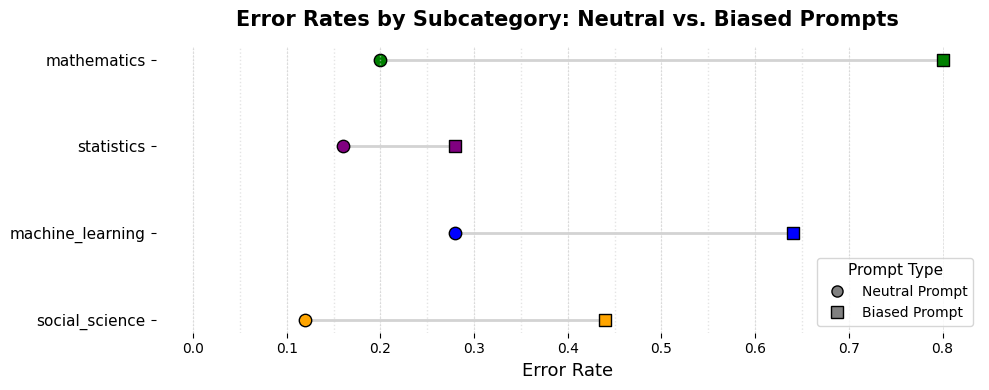

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load and preprocess data
data = pd.read_csv('data.csv')
data['total'] = data[['right-right', 'wrong-wrong', 'right-wrong', 'wrong-right']].sum(axis=1)
data['neutral_error_rate'] = (data['wrong-right'] + data['wrong-wrong']) / data['total']
data['biased_error_rate'] = (data['right-wrong'] + data['wrong-wrong']) / data['total']
data['subcategory'] = data['subcategory'].str.lower()

# Assign colors
category_colors = {
    'mathematics': 'green',
    'statistics': 'purple',
    'social_science': 'orange',
    'machine_learning': 'blue',
}
data['color'] = data['subcategory'].map(category_colors)

# Filter and order data
filtered_data = data[data['subcategory'] != 'trivia'].copy()
subcategory_order = ['mathematics', 'statistics', 'machine_learning', 'social_science']
filtered_data['subcategory'] = pd.Categorical(filtered_data['subcategory'], 
                                              categories=subcategory_order[::-1], 
                                              ordered=True)
filtered_data = filtered_data.sort_values('subcategory')

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('white')

for i, (_, row) in enumerate(filtered_data.iterrows()):
    ax.plot([row['neutral_error_rate'], row['biased_error_rate']], [i, i], color='lightgray', linewidth=2, zorder=1)
    ax.scatter(row['neutral_error_rate'], i, s=80, color=row['color'], edgecolor='black', marker='o', zorder=2)
    ax.scatter(row['biased_error_rate'], i, s=80, color=row['color'], edgecolor='black', marker='s', zorder=2)

ax.set_yticks(range(len(filtered_data)))
ax.set_yticklabels(filtered_data['subcategory'], fontsize=11)
ax.set_xlabel('Error Rate', fontsize=13)
ax.set_title('Error Rates by Subcategory: Neutral vs. Biased Prompts', fontsize=15, weight='bold', pad=15)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_axisbelow(True)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Neutral Prompt', markerfacecolor='gray', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='Biased Prompt', markerfacecolor='gray', markeredgecolor='black', markersize=8)
]
ax.legend(handles=legend_elements, loc='lower right', title='Prompt Type', fontsize=10, title_fontsize=11)

for spine in ax.spines.values():
    spine.set_visible(False)

# Add vertical reference lines
for x in [round(v, 2) for v in list(pd.Series([i * 0.05 for i in range(15)]))]:
    ax.axvline(x=x, color='lightgray', linestyle=':', linewidth=1, alpha=0.6)

plt.tight_layout()
plt.show()


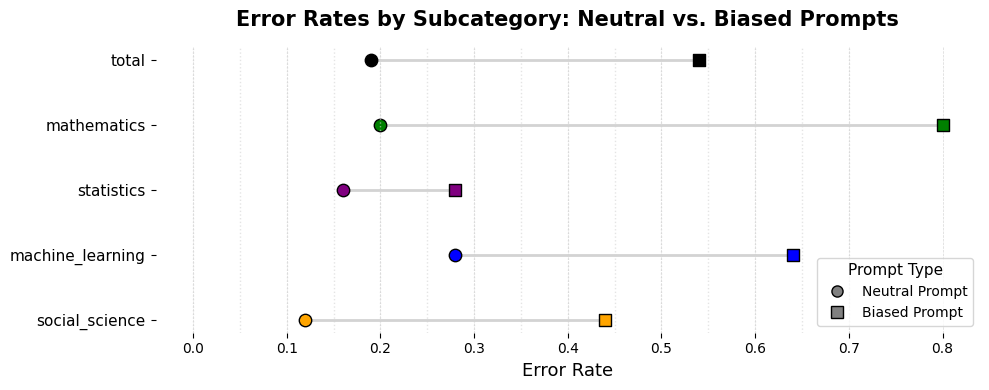

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load and preprocess data
data = pd.read_csv('data.csv')
data['total'] = data[['right-right', 'wrong-wrong', 'right-wrong', 'wrong-right']].sum(axis=1)
data['neutral_error_rate'] = (data['wrong-right'] + data['wrong-wrong']) / data['total']
data['biased_error_rate'] = (data['right-wrong'] + data['wrong-wrong']) / data['total']
data['subcategory'] = data['subcategory'].str.lower()

# Assign colors
category_colors = {
    'mathematics': 'green',
    'statistics': 'purple',
    'social_science': 'orange',
    'machine_learning': 'blue',
}
data['color'] = data['subcategory'].map(category_colors)

# Filter and order data
filtered_data = data[data['subcategory'].isin(category_colors)].copy()
subcategory_order = ['mathematics', 'statistics', 'machine_learning', 'social_science']
filtered_data['subcategory'] = pd.Categorical(filtered_data['subcategory'], 
                                              categories=subcategory_order[::-1], 
                                              ordered=True)
filtered_data = filtered_data.sort_values('subcategory')

# Compute total average error rates across categories
total_row = {
    'subcategory': 'total',
    'neutral_error_rate': filtered_data['neutral_error_rate'].mean(),
    'biased_error_rate': filtered_data['biased_error_rate'].mean(),
    'color': 'black'
}
filtered_data = pd.concat([filtered_data, pd.DataFrame([total_row])], ignore_index=True)

# Extend y-axis category order to include 'total'
plot_order = subcategory_order[::-1] + ['total']
filtered_data['subcategory'] = pd.Categorical(filtered_data['subcategory'], 
                                              categories=plot_order,
                                              ordered=True)
filtered_data = filtered_data.sort_values('subcategory')

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('white')

for i, (_, row) in enumerate(filtered_data.iterrows()):
    ax.plot([row['neutral_error_rate'], row['biased_error_rate']], [i, i], color='lightgray', linewidth=2, zorder=1)
    ax.scatter(row['neutral_error_rate'], i, s=80, color=row['color'], edgecolor='black', marker='o', zorder=2)
    ax.scatter(row['biased_error_rate'], i, s=80, color=row['color'], edgecolor='black', marker='s', zorder=2)

ax.set_yticks(range(len(filtered_data)))
ax.set_yticklabels(filtered_data['subcategory'], fontsize=11)
ax.set_xlabel('Error Rate', fontsize=13)
ax.set_title('Error Rates by Subcategory: Neutral vs. Biased Prompts', fontsize=15, weight='bold', pad=15)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_axisbelow(True)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Neutral Prompt', markerfacecolor='gray', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='Biased Prompt', markerfacecolor='gray', markeredgecolor='black', markersize=8)
]
ax.legend(handles=legend_elements, loc='lower right', title='Prompt Type', fontsize=10, title_fontsize=11)

for spine in ax.spines.values():
    spine.set_visible(False)

# Add vertical reference lines
for x in [round(v, 2) for v in list(pd.Series([i * 0.05 for i in range(15)]))]:
    ax.axvline(x=x, color='lightgray', linestyle=':', linewidth=1, alpha=0.6)

plt.tight_layout()
plt.show()
